<h1 style='text-align: center;'><strong>Decision Tree Classifications</strong> | <em>Group 12</em></h1>

Import các thư viện và các hàm cần dùng

In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
import optuna
from sklearn.model_selection import train_test_split,cross_val_score 

Đọc dataset dạng CSV

In [ ]:
df=pd.read_csv('DTWATAB.csv')

Xem qua dữ liệu

In [20]:
df

,BET_ACCOUNT_NUM_HASH,COUNT_ORDER,AGE_2022,TOTAL_SPEND,DATE_MAX,TOTAL_PAID,TICKETS,LAST_TO_PRESENT_MIN,TENURE_IN_DAYS_MAX,TOTAL_DAY,TOTAL_PROFIT,DATE_MIN,GENDER,CUSTOMER_SEGMENT
0,13154,463,67.0,366186.08,2022-12-31,270817.07,113627,1,12575,730,81925.965516,2021-01-01,M,2
1,18379,199,54.0,32033.00,2022-12-31,23658.86,841,1,2613,730,6645.733653,2021-01-01,M,2
2,37251,1,22.0,100.00,2022-11-01,760.00,7,61,0,61,-689.654776,2022-11-01,U,0
3,129273,16,22.0,155.00,2022-12-19,149.45,37,13,358,371,5.550000,2021-12-26,U,1
4,348318,4,29.0,30.00,2022-09-24,0.00,17,99,106,205,27.581731,2022-06-10,U,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144291,4294834703,335,47.0,175772.30,2022-12-24,141583.30,1905,8,5194,730,32669.965890,2021-01-01,M,2
144292,4294891076,535,67.0,72043.91,2022-12-31,51175.39,32283,1,3646,730,15301.435310,2021-01-01,F,2
144293,4294928673,1,38.0,8.00,2021-11-02,0.00,4,425,728,425,2.380160,2021-11-02,U,0
144294,4294964456,1,21.0,67.00,2022-11-23,7.40,24,39,0,39,30.326392,2022-11-23,U,0


Hình dạng dataset

In [6]:
df.shape

(144296, 14)

Thông tin của từng cột trong dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144296 entries, 0 to 144295
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BET_ACCOUNT_NUM_HASH  144296 non-null  int64  
 1   COUNT_ORDER           144296 non-null  int64  
 2   AGE_2022              144296 non-null  float64
 3   TOTAL_SPEND           144296 non-null  float64
 4   DATE_MAX              144296 non-null  object 
 5   TOTAL_PAID            144296 non-null  float64
 6   TICKETS               144296 non-null  int64  
 7   LAST_TO_PRESENT_MIN   144296 non-null  int64  
 8   TENURE_IN_DAYS_MAX    144296 non-null  int64  
 9   TOTAL_DAY             144296 non-null  int64  
 10  TOTAL_PROFIT          144296 non-null  float64
 11  DATE_MIN              144296 non-null  object 
 12  GENDER                144296 non-null  object 
 13  CUSTOMER_SEGMENT      144296 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 15.

Mô tả dataset

In [26]:
df.describe()

,BET_ACCOUNT_NUM_HASH,COUNT_ORDER,AGE_2022,TOTAL_SPEND,TOTAL_PAID,TICKETS,LAST_TO_PRESENT_MIN,TENURE_IN_DAYS_MAX,TOTAL_DAY,TOTAL_PROFIT,CUSTOMER_SEGMENT
count,1.442960e+05,144296.000000,144296.000000,1.442960e+05,1.442960e+05,144296.000000,144296.000000,144296.000000,144296.000000,144296.000000,144296.000000
mean,2.143265e+09,85.331894,43.764443,1.512932e+04,1.250025e+04,1890.028400,150.841201,2023.803979,514.949763,2366.034727,0.939333
std,1.239244e+09,142.045513,15.890819,6.187945e+04,5.421097e+04,8893.073172,201.847380,2568.686066,237.814669,9366.458522,0.787770
min,1.315400e+04,1.000000,18.000000,5.000000e-01,0.000000e+00,1.000000,1.000000,0.000000,1.000000,-327327.363450,0.000000
25%,1.071052e+09,3.000000,31.000000,1.610000e+02,7.230750e+01,17.000000,5.000000,253.000000,407.000000,20.000000,0.000000
50%,2.144741e+09,18.000000,41.000000,9.889050e+02,7.354200e+02,101.000000,59.000000,1188.000000,617.000000,150.000000,1.000000
75%,3.211163e+09,98.000000,55.000000,7.059443e+03,5.886087e+03,702.000000,256.000000,2674.000000,727.000000,1061.203013,2.000000
max,4.294965e+09,730.000000,104.000000,5.544861e+06,4.507252e+06,699955.000000,730.000000,21329.000000,730.000000,467391.877278,2.000000


Kiểm tra giá trị null trong dataset

In [27]:
df.isnull().sum()

BET_ACCOUNT_NUM_HASH    0
COUNT_ORDER             0
AGE_2022                0
TOTAL_SPEND             0
DATE_MAX                0
TOTAL_PAID              0
TICKETS                 0
LAST_TO_PRESENT_MIN     0
TENURE_IN_DAYS_MAX      0
TOTAL_DAY               0
TOTAL_PROFIT            0
DATE_MIN                0
GENDER                  0
CUSTOMER_SEGMENT        0
dtype: int64

Kiểm tra giá trị trùng lặp trong dataset

In [28]:
df.duplicated().sum()

0

Trực quan hóa các cột trong dataset bằng biểu đồ histogram để xem phân phối của từng cột

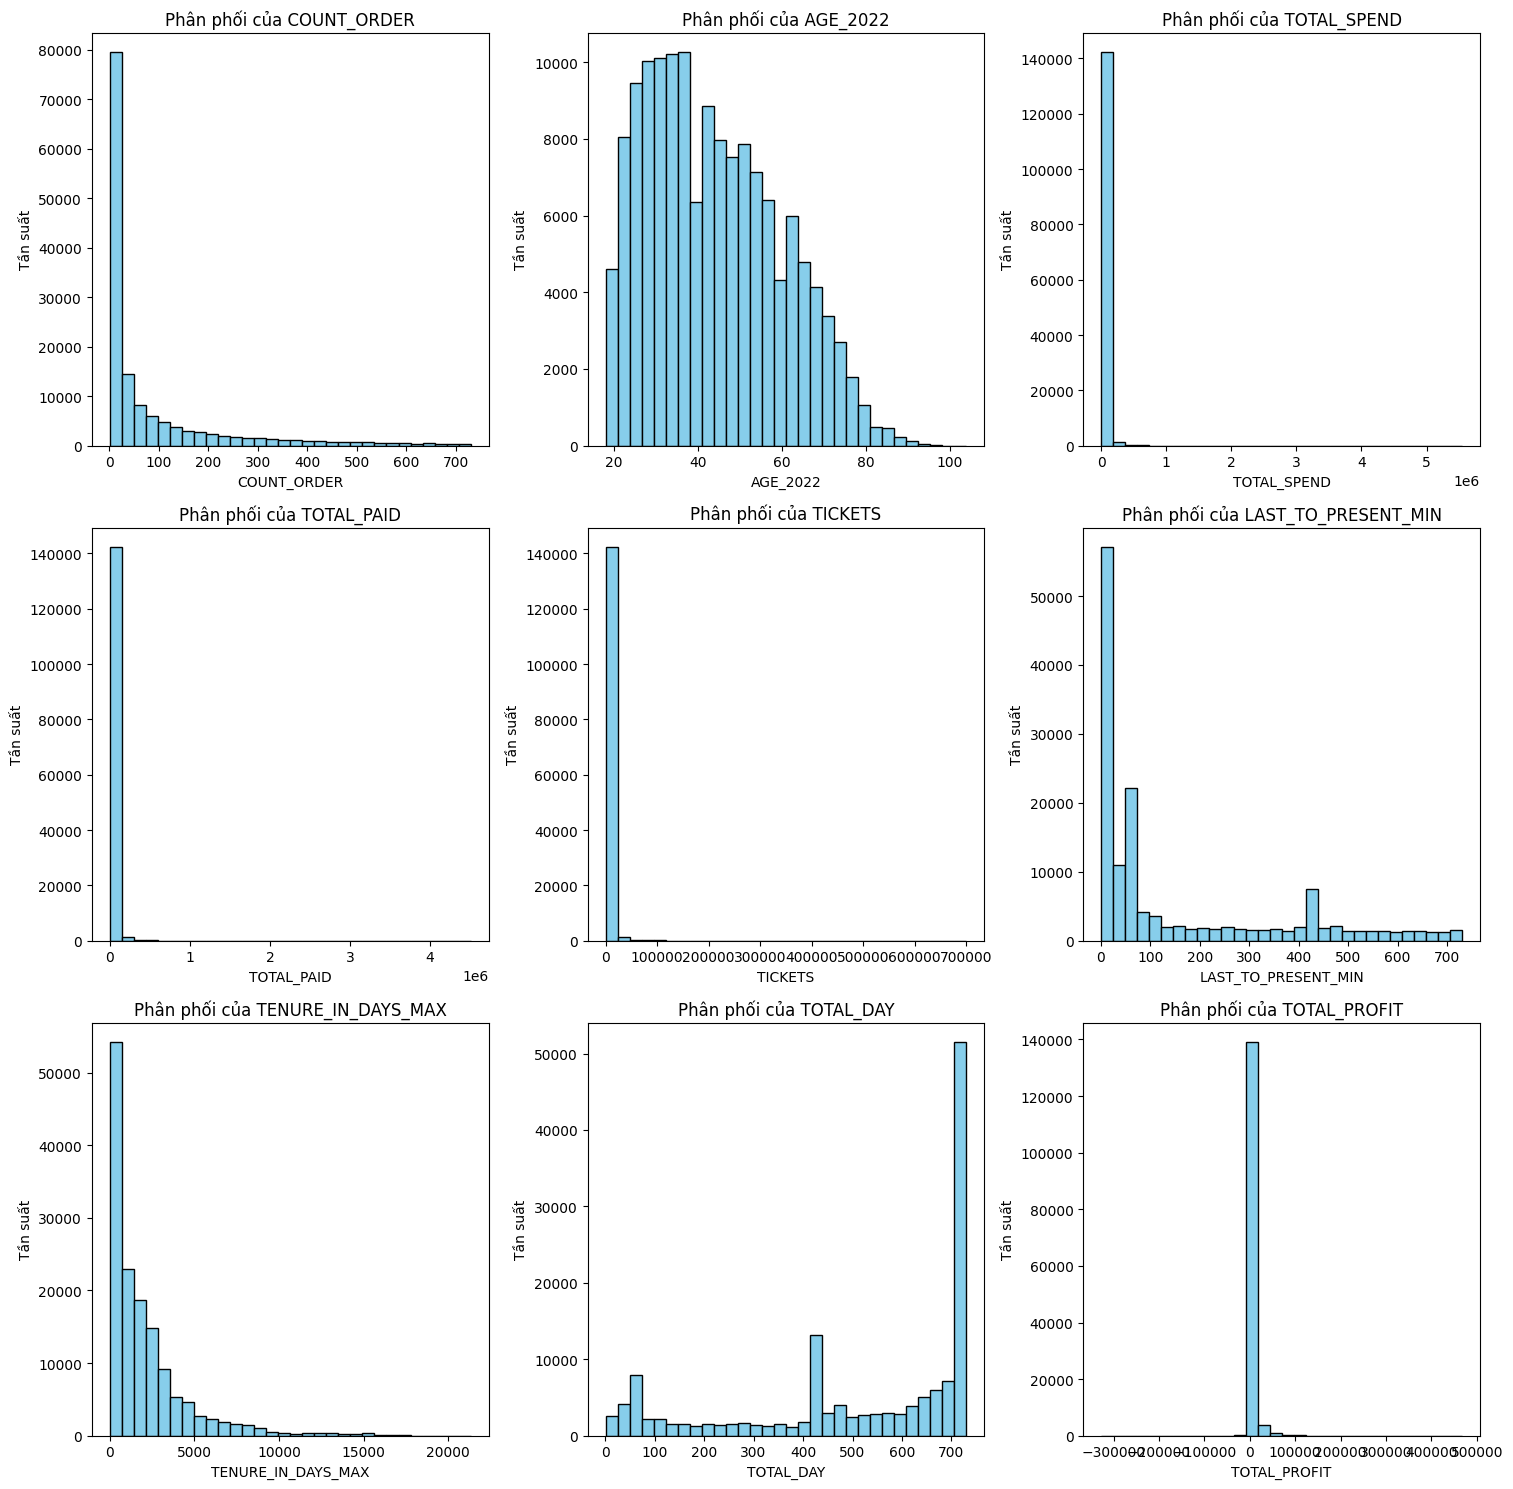

In [21]:
numerical_columns = df.drop(columns=['BET_ACCOUNT_NUM_HASH', 'CUSTOMER_SEGMENT']).select_dtypes(include=['float', 'int']).columns
num_plots = len(numerical_columns)

# Setup số lượng hàng và cột (ở đây là 3 hàng và các cột tùy thuộc vào số lượng biến)
num_rows = 3
num_columns = math.ceil(num_plots / num_rows)

# Tạo khung lớn với số lượng hàng và cột phù hợp
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 5, num_rows * 5))

# Lặp qua từng cột số và vẽ biểu đồ histogram
for i, column in enumerate(numerical_columns):
    row = i // num_columns
    col = i % num_columns
    
    # Vẽ biểu đồ vào đúng vị trí trong lưới
    axes[row, col].hist(df.drop(columns=['BET_ACCOUNT_NUM_HASH', 'CUSTOMER_SEGMENT'])[column], bins=30, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Phân phối của {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Tần suất')

# Xóa các ô trống nếu số lượng biến không chia hết cho số cột
for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes[j // num_columns, j % num_columns])

plt.tight_layout()
plt.show()

Phân tổ dữ liệu sử dụng hàm qcut từ thư viện pandas. Chia dữ liệu dự trên phân vị

In [8]:
df['RECENCY']=pd.qcut(df['LAST_TO_PRESENT_MIN'],5,labels=range(4, -1, -1)).astype(int)
df['FREQUENCY']=pd.qcut(df['COUNT_ORDER'],5,labels=range(0, 5)).astype(int)
df['MONETARY']=pd.qcut(df['TOTAL_SPEND'],5,labels=range(0, 5)).astype(int)
df['TENURE_IN_DAYS_LABEL']=pd.qcut(df['TENURE_IN_DAYS_MAX'],5,labels=range(0, 5)).astype(int)

Phân tổ dữ liệu của cột AGE_2022 theo độ tuổi. Độ tuổi chia dựa vào các tiêu chí của WHO.

In [9]:
def age_label(value):
  if 17 < value <25: #Thanh niên: từ 18 dến 24 tuổi
    label = 0
  elif 24 < value <45: #Trưởng thành trẻ: từ 25 đến 44 tuổi
    label = 1
  elif 44 < value <60: #Trưởng thành trung niên: từ 45 đến 59 tuổi
    label = 2
  else:               #Người cao tuổi: trên 60 tuổi
    label = 3
  return label
df['AGE_LABEL'] = df['AGE_2022'].apply(age_label)

Trích xuất các cột cần sử dụng trong mô hình cây quyết định từ dataset

In [10]:
df_dt = df[['AGE_LABEL', 'RECENCY', 'FREQUENCY', 'MONETARY', 'TENURE_IN_DAYS_LABEL', 'GENDER', 'CUSTOMER_SEGMENT']]

Mã hóa giá trị của cột giới tính

In [11]:
df_dt['GENDER'] = df_dt['GENDER'].replace({'U':2, 'M':1, 'F':0})

C:\Users\NITRO\AppData\Local\Temp\ipykernel_6664\3027194375.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dt['GENDER'] = df_dt['GENDER'].replace({'U':2, 'M':1, 'F':0})
C:\Users\NITRO\AppData\Local\Temp\ipykernel_6664\3027194375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt['GENDER'] = df_dt['GENDER'].replace({'U':2, 'M':1, 'F':0})


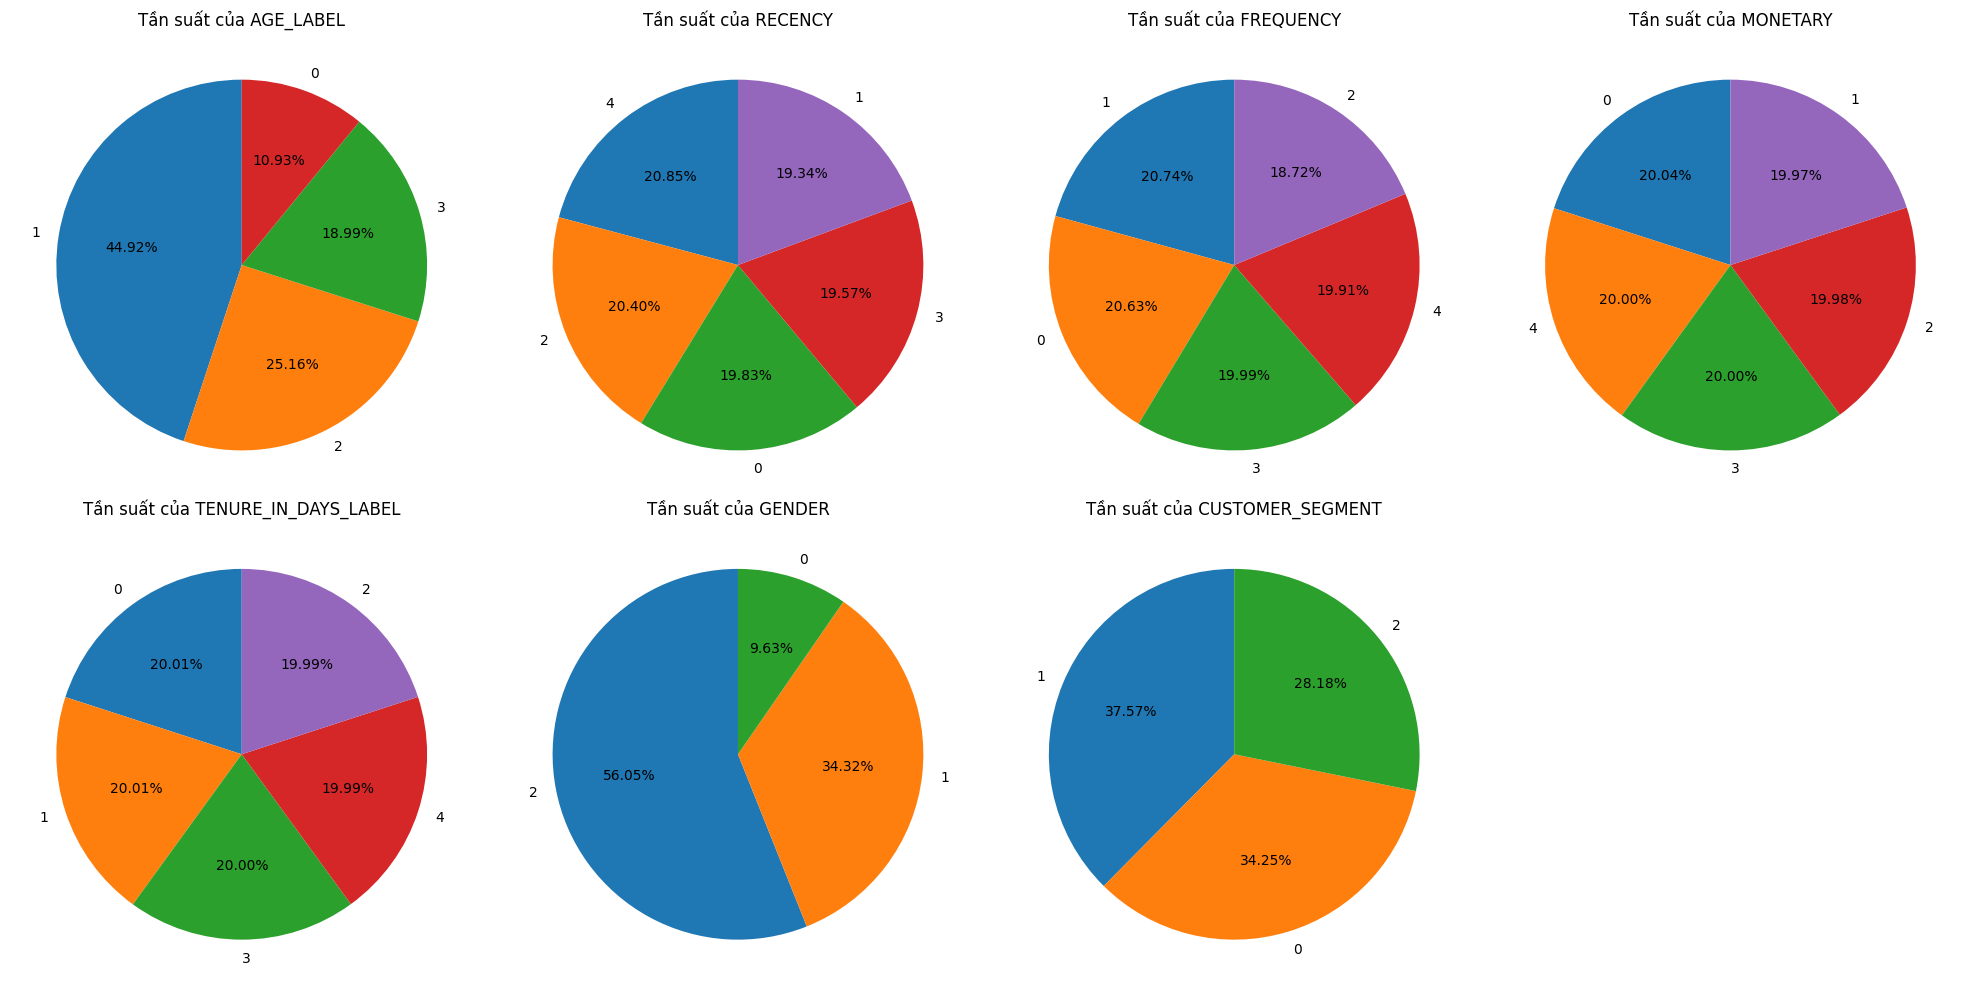

In [28]:
categorical_columns = df_dt.select_dtypes(include=['int']).columns
num_plots = len(categorical_columns)

# Tính toán số hàng và cột (mỗi hàng 4 biểu đồ)
num_columns = 4
num_rows = math.ceil(num_plots / num_columns)

# Tạo khung chứa biểu đồ với kích thước phù hợp
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 5, num_rows * 5))

# Lặp qua từng cột phân loại và vẽ biểu đồ bánh
for i, column in enumerate(categorical_columns):
    counts = df_dt[column].value_counts()
    row = i // num_columns
    col = i % num_columns
    
    # Vẽ biểu đồ bánh vào đúng vị trí trong lưới
    axes[row, col].pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90)
    axes[row, col].set_title(f'Tần suất của {column}')

# Xóa các ô thừa nếu số biểu đồ không chia hết cho 4
for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes[j // num_columns, j % num_columns])

plt.tight_layout()
plt.show()

Kiểm tra mối quan hệ tương quan giữa các biến của mô hình

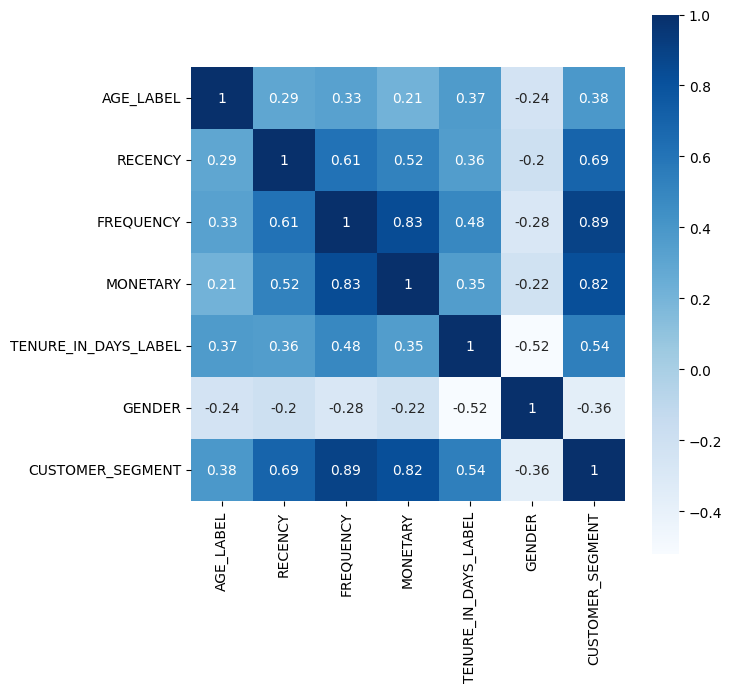

In [29]:
plt.figure(figsize=(7,7))
sns.heatmap(df_dt.corr(), annot=True,square=True, cmap='Blues')
plt.show()

Xác định các biến đầu vào và biến mục tiêu

In [35]:
X=df_dt.drop(columns=['CUSTOMER_SEGMENT']) #Các biến đầu vào
y=df_dt['CUSTOMER_SEGMENT'] #Biến mục tiêu

Chia bộ dataset thành tập huấn luyện và tập kiểm tra theo tỉ lệ 70-30

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)

Ttìm siêu tham số cho câu quyết định bằng thư viện optuna

In [ ]:
def objective_dt(trial_dt): #Tạo hàm có tên objective_dt và hàm này nhận 1 tham số là trial_dt
  #Xét giá trị cho các tham số của mô hình cây quyết định trong một khoảng nhất định.
  max_features=trial_dt.suggest_int('max_features',4,20)
  max_depth=trial_dt.suggest_int('max_depth',4,20)
  min_samples_leaf=trial_dt.suggest_int('min_samples_leaf', 2,10)
  min_samples_split = trial_dt.suggest_int('min_samples_split', 2,10)
  min_weight_fraction_leaf = trial_dt.suggest_loguniform('min_weight_fraction_leaf', 0.01, 0.5)
  
  #Xây dựng thuật mô hình cây quyết định dựa trên thuật toán ID3 (criterion='entropy') và truyền vào các tham số của
  #mô hình các giá trị trong khoảng ở trên.
  model=tree.DecisionTreeClassifier(random_state=21,
                               criterion='entropy',
                               max_leaf_nodes=30,
                               max_features=max_features,
                               min_samples_leaf=min_samples_leaf,
                               min_samples_split=min_samples_split, 
                               min_weight_fraction_leaf=min_weight_fraction_leaf,
                               max_depth=max_depth)
  
  #Thực hiện cross-validation bằng hàm cross_val_score để tính toán độ chính xác trung bình của mô hình.
  score=cross_val_score(model, X_train, y_train, n_jobs=-1) 
  accuracy=score.mean()
  
  #Hàm này sẽ trả về độ chính xác của mô hình theo từng giá trị tham số của cây quyết định
  return accuracy

#Tạo một Study từ thư viện optuna để tối ưu hóa độ chính xác của mô hình, tham số direction='maximize' 
#cho biết optuna sẽ cố gắng tìm ra độ chính xác cao nhất của mô hình và học nó.
study_dt=optuna.create_study(direction='maximize')

#Bắt đầu thực hiện quá trình tối ưu hóa bằng cách thực hiện hàm objective_dt 100 lần với các giá trị tham số khác nhau
study_dt.optimize(objective_dt, n_trials=100)

#Trả về tham số có độ chính xác cao nhất sau 100 lần học
study_dt.best_params

[I 2024-11-06 14:59:37,974] A new study created in memory with name: no-name-3885da1f-a17e-413e-bb1a-b16cd6076fcf
C:\Users\NITRO\AppData\Local\Temp\ipykernel_1268\2282199883.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  min_weight_fraction_leaf = trial_dt.suggest_loguniform('min_weight_fraction_leaf', 0.01, 0.5)
[I 2024-11-06 14:59:42,180] Trial 0 finished with value: 0.7757382984698464 and parameters: {'max_features': 16, 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.2320049163737417}. Best is trial 0 with value: 0.7757382984698464.
C:\Users\NITRO\AppData\Local\Temp\ipykernel_1268\2282199883.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float

{'max_features': 10,
 'max_depth': 20,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.010231935494279924}

Sử dụng mô hình đã import vào từ trước từ thư viện scikit-learn

In [9]:
dt=tree.DecisionTreeClassifier(random_state=21, criterion='entropy',
                          max_leaf_nodes=30,
                          max_depth=20,
                          max_features=16,
                          min_samples_leaf=7,
                          min_samples_split=7,
                          min_weight_fraction_leaf=0.010231935494279924).fit(X_train, y_train)

Kiểm tra tính ổn định và độ tổng quát của mô hình bằng cách đánh giá chéo 5 lần (k-fold cross-validation)

In [ ]:
print(cross_val_score(dt, X_train, y_train)) #Tham số cv mặc đinh là 5

[0.9044649  0.8999109  0.90406416 0.89936142 0.90134152]


Sử dụng mô hình để phân loại dựa trên tập kiếm tra của X

In [38]:
y_pred_tree=dt.predict(X_test)

Ma trận nhẫm lần của thực tế và dự báo

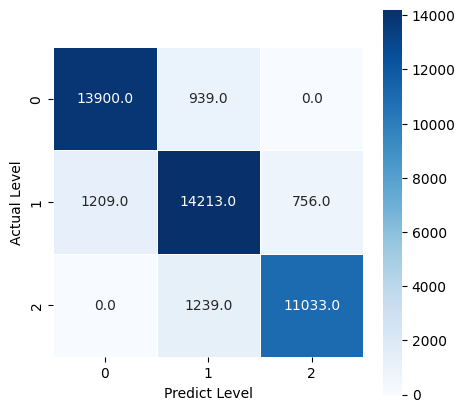

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True,fmt='0.1f', linewidth= 0.5,square=True,cmap=plt.cm.Blues)
plt.xlabel('Predict Level')
plt.ylabel('Actual Level')
plt.show()

Báo cáo phân loại của mô hình dựa trên y_test và y_pred_tree

In [40]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14839
           1       0.87      0.88      0.87     16178
           2       0.94      0.90      0.92     12272

    accuracy                           0.90     43289
   macro avg       0.91      0.90      0.91     43289
weighted avg       0.90      0.90      0.90     43289



Đánh giá độ quan trọng của các biến đầu vào trong mô hình

<Axes: >

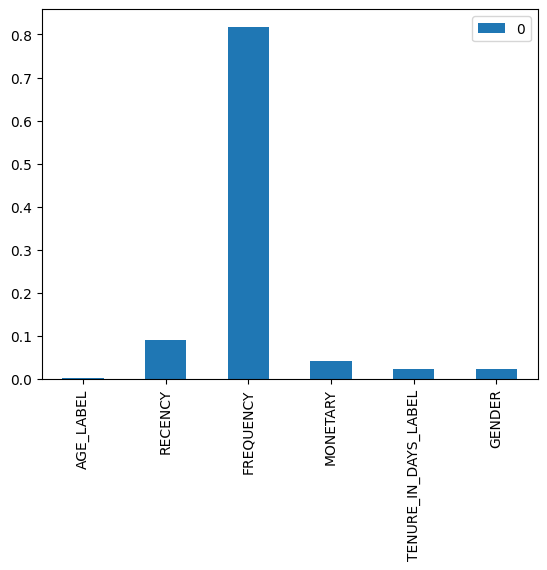

In [43]:
feature_importance=pd.DataFrame(dt.feature_importances_,index=X.columns)
feature_importance.plot(kind='bar')

Vẽ sơ đồ cây cho mô hình

[Text(0.4753289473684211, 0.9375, 'x[2] <= 1.5\nentropy = 1.575\nsamples = 101007\nvalue = [34577.0, 38040.0, 28390.0]'),
 Text(0.14473684210526316, 0.8125, 'x[2] <= 0.5\nentropy = 0.73\nsamples = 41780\nvalue = [33278.0, 8500.0, 2.0]'),
 Text(0.05263157894736842, 0.6875, 'x[4] <= 2.5\nentropy = 0.145\nsamples = 20775\nvalue = [20345, 430, 0]'),
 Text(0.02631578947368421, 0.5625, 'entropy = 0.053\nsamples = 16602\nvalue = [16502, 100, 0]'),
 Text(0.07894736842105263, 0.5625, 'entropy = 0.399\nsamples = 4173\nvalue = [3843, 330, 0]'),
 Text(0.23684210526315788, 0.6875, 'x[1] <= 1.5\nentropy = 0.962\nsamples = 21005\nvalue = [12933.0, 8070.0, 2.0]'),
 Text(0.13157894736842105, 0.5625, 'x[3] <= 1.5\nentropy = 0.733\nsamples = 11228\nvalue = [8922, 2306, 0]'),
 Text(0.07894736842105263, 0.4375, 'x[5] <= 1.5\nentropy = 0.469\nsamples = 7862\nvalue = [7075, 787, 0]'),
 Text(0.05263157894736842, 0.3125, 'x[3] <= 0.5\nentropy = 0.827\nsamples = 2576\nvalue = [1906.0, 670.0, 0.0]'),
 Text(0.026

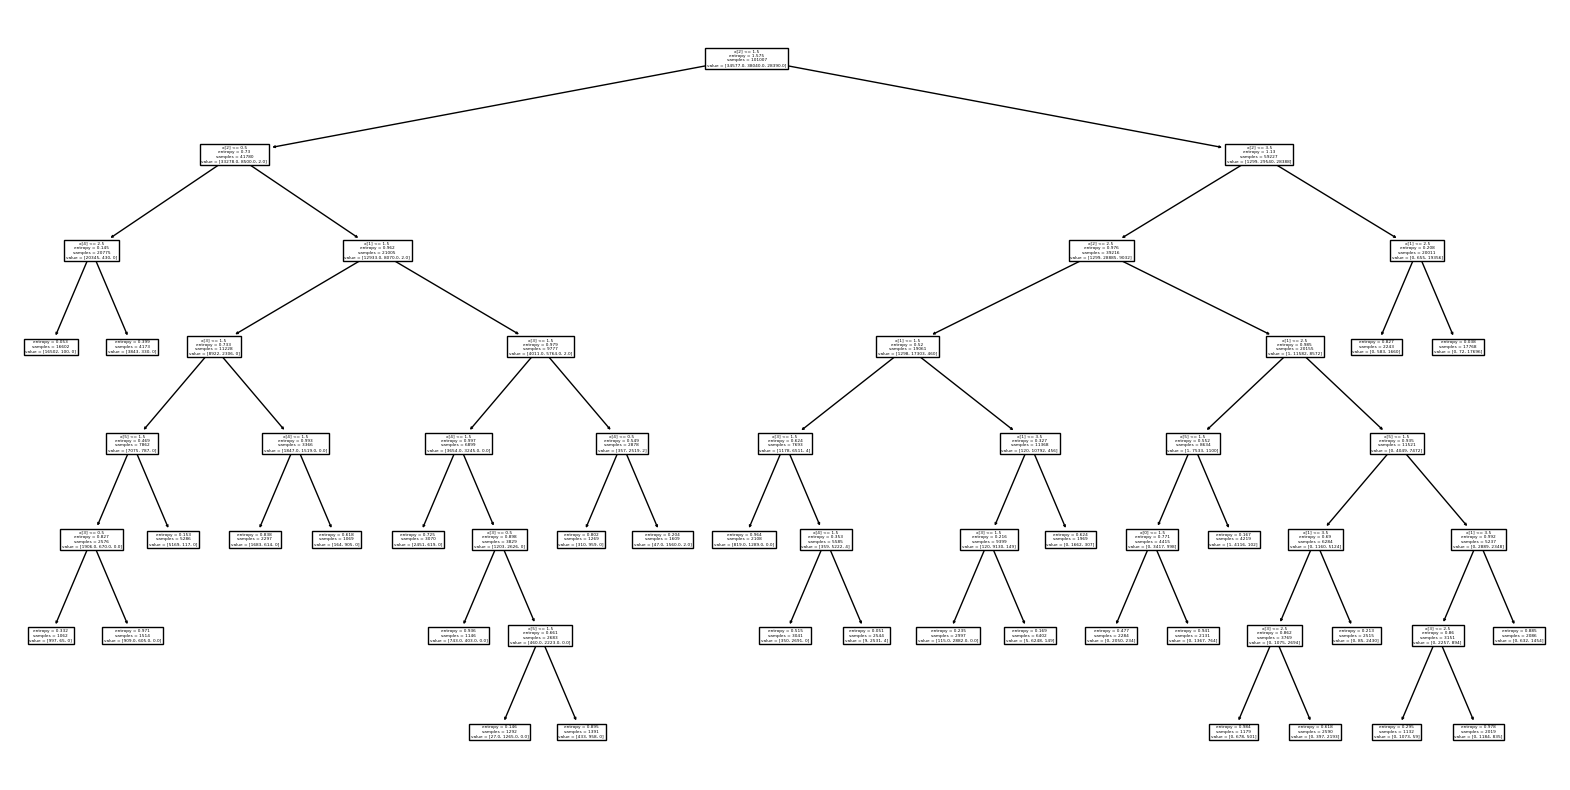

In [44]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt)

Xem lại các tham số đã sử dụng của mô hình

In [42]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 16,
 'max_leaf_nodes': 30,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.010231935494279924,
 'monotonic_cst': None,
 'random_state': 21,
 'splitter': 'best'}

<div style='text-align: center; margin-top: 15px;'>Điều chỉnh tham số của mô hình để phân tích cây</div>

In [49]:
dt_test=tree.DecisionTreeClassifier(random_state=21, criterion='entropy',
                          max_leaf_nodes=9,
                          max_depth=12,
                          max_features=14,
                          min_samples_leaf=2,
                          min_samples_split=6,
                          min_weight_fraction_leaf=0.030975385070306494).fit(X_train, y_train)

[Text(0.4230769230769231, 0.9166666666666666, 'FREQUENCY <= 1.5\nentropy = 1.575\nsamples = 101007\nvalue = [34577.0, 38040.0, 28390.0]\nclass = 1'),
 Text(0.15384615384615385, 0.75, 'FREQUENCY <= 0.5\nentropy = 0.73\nsamples = 41780\nvalue = [33278.0, 8500.0, 2.0]\nclass = 0'),
 Text(0.07692307692307693, 0.5833333333333334, 'entropy = 0.145\nsamples = 20775\nvalue = [20345, 430, 0]\nclass = 0'),
 Text(0.23076923076923078, 0.5833333333333334, 'RECENCY <= 1.5\nentropy = 0.962\nsamples = 21005\nvalue = [12933.0, 8070.0, 2.0]\nclass = 0'),
 Text(0.15384615384615385, 0.4166666666666667, 'entropy = 0.733\nsamples = 11228\nvalue = [8922, 2306, 0]\nclass = 0'),
 Text(0.3076923076923077, 0.4166666666666667, 'entropy = 0.979\nsamples = 9777\nvalue = [4011.0, 5764.0, 2.0]\nclass = 1'),
 Text(0.6923076923076923, 0.75, 'FREQUENCY <= 3.5\nentropy = 1.13\nsamples = 59227\nvalue = [1299, 29540, 28388]\nclass = 1'),
 Text(0.6153846153846154, 0.5833333333333334, 'FREQUENCY <= 2.5\nentropy = 0.976\nsamp

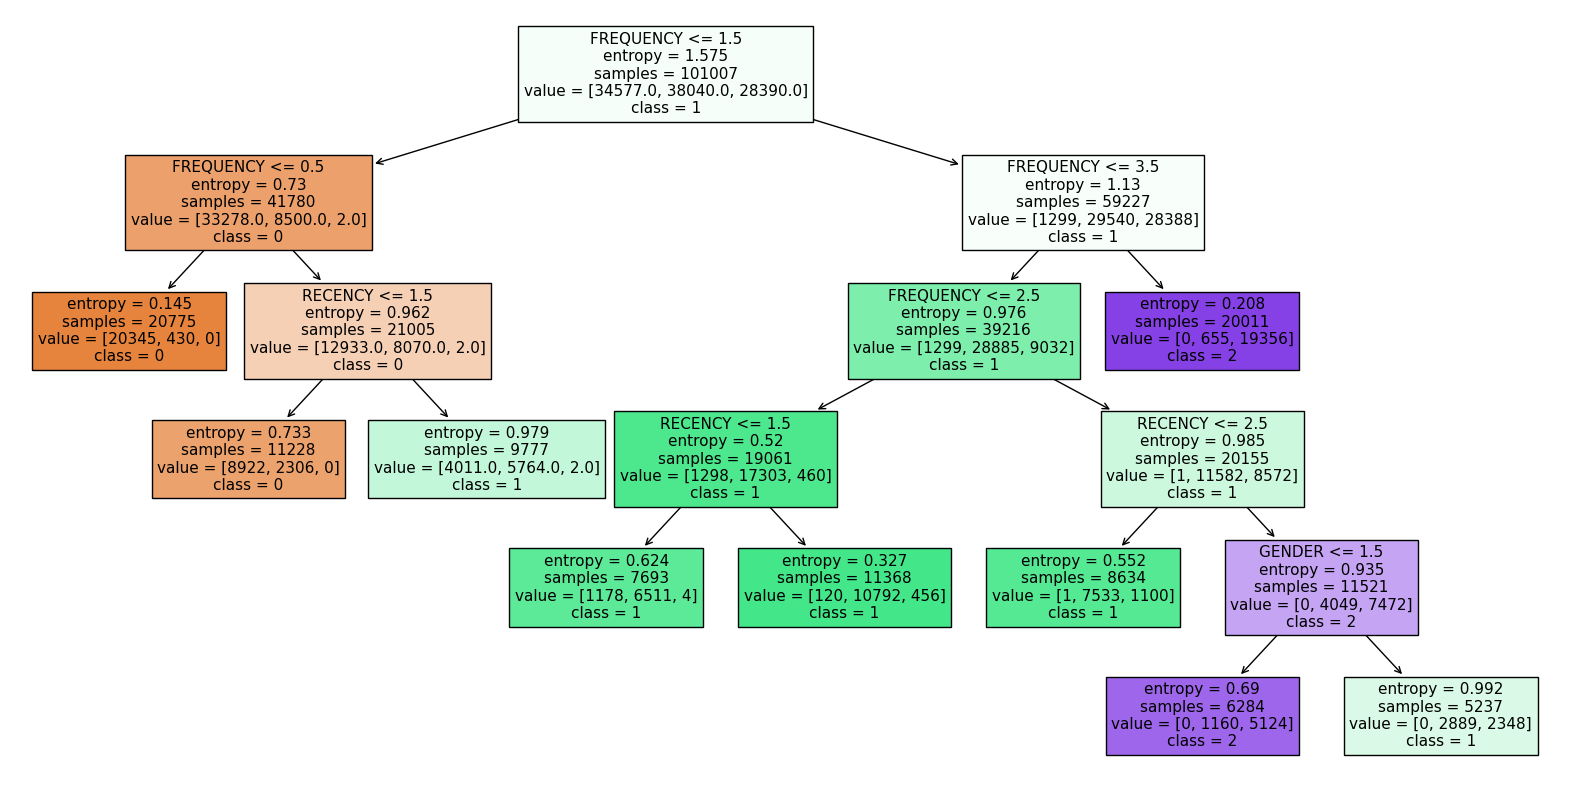

In [50]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_test, fontsize=11, filled=True, feature_names=X.columns, class_names=dt.classes_.astype(str))